In [1]:
cd g:/dd-resource/slides/homework/ML_project/project/

g:\dd-resource\slides\homework\ML_project\project


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def dummy_F(df,dummy_fields):
    for each in dummy_fields:
        dummies = pd.get_dummies( df.loc[:, each], prefix=each ) 
        df = pd.concat( [df, dummies], axis = 1 )
        df.pop(each)
    return df

def assign_integer(train):
    single = train[(train.marital == 'single')].index.values
    married = train[(train.marital == 'married')].index.values
    divorced = train[(train.marital == 'divorced')].index.values
    
    train.loc[single, 'marital'] = int(1)
    train.loc[married, 'marital'] = int(2)
    train.loc[divorced, 'marital'] = int(3)
    
    admin = train[(train.profession == 'admin.')].index.values
    bluecollar = train[(train.profession == 'blue-collar')].index.values
    entrepreneur = train[(train.profession == 'entrepreneur')].index.values
    housemaid = train[(train.profession == 'housemaid')].index.values
    management = train[(train.profession == 'management')].index.values
    retired = train[(train.profession == 'retired')].index.values
    selfemployed = train[(train.profession == 'self-employed')].index.values
    services = train[(train.profession == 'services')].index.values
    student = train[(train.profession == 'student')].index.values
    technician = train[(train.profession == 'technician')].index.values
    unemployed = train[(train.profession == 'unemployed')].index.values


    train.loc[admin, 'profession'] = int(1)
    train.loc[bluecollar, 'profession'] = int(2)
    train.loc[entrepreneur, 'profession'] = int(3)
    train.loc[housemaid, 'profession'] = int(4)
    train.loc[management, 'profession'] = int(5)
    train.loc[retired, 'profession'] = int(6)
    train.loc[selfemployed, 'profession'] = int(7)
    train.loc[services, 'profession'] = int(8)
    train.loc[student, 'profession'] = int(9)
    train.loc[technician, 'profession'] = int(10)
    train.loc[unemployed, 'profession'] = int(11)


    basic4y = train[(train.schooling == 'basic.4y')].index.values
    basic6y = train[(train.schooling == 'basic.6y')].index.values
    basic9y = train[(train.schooling == 'basic.9y')].index.values
    highschool = train[(train.schooling == 'high.school')].index.values
    illiterate = train[(train.schooling == 'illiterate')].index.values
    prof = train[(train.schooling == 'professional.course')].index.values
    uni = train[(train.schooling == 'university.degree')].index.values


    train.loc[basic4y, 'schooling'] = int(1)
    train.loc[basic6y, 'schooling'] = int(2)
    train.loc[basic9y, 'schooling'] = int(3)
    train.loc[highschool, 'schooling'] = int(4)
    train.loc[illiterate, 'schooling'] = int(5)
    train.loc[prof, 'schooling'] = int(6)
    train.loc[uni, 'schooling'] = int(7)

    fri = train[(train.day_of_week == 'fri')].index.values
    thu = train[(train.day_of_week == 'thu')].index.values
    wed = train[(train.day_of_week == 'wed')].index.values
    tue = train[(train.day_of_week == 'tue')].index.values
    mon = train[(train.day_of_week == 'mon')].index.values


    train.loc[mon, 'day_of_week'] = int(1)
    train.loc[tue, 'day_of_week'] = int(2)
    train.loc[wed, 'day_of_week'] = int(3)
    train.loc[thu, 'day_of_week'] = int(4)
    train.loc[fri, 'day_of_week'] = int(5)

    mar = train[(train.month == 'mar')].index.values
    apr = train[(train.month == 'apr')].index.values
    may = train[(train.month == 'may')].index.values
    jun = train[(train.month == 'jun')].index.values
    jul = train[(train.month == 'jul')].index.values
    aug = train[(train.month == 'aug')].index.values
    sep = train[(train.month == 'sep')].index.values
    oct_ = train[(train.month == 'oct')].index.values
    nov= train[(train.month == 'nov')].index.values
    dec = train[(train.month == 'dec')].index.values


    train.loc[mar, 'month'] = int(3)
    train.loc[apr, 'month'] = int(4)
    train.loc[may, 'month'] = int(5)
    train.loc[jun, 'month'] = int(6)
    train.loc[jul, 'month'] = int(7)
    train.loc[aug, 'month'] = int(8)
    train.loc[sep, 'month'] = int(9)
    train.loc[oct_, 'month'] = int(10)
    train.loc[nov, 'month'] = int(11)
    train.loc[dec, 'month'] = int(12)
    
    train=train.replace("cellular",0)
    train=train.replace("telephone",1)
    
    train=train.replace("nonexistent",0)
    train=train.replace("failure",1)
    train=train.replace("success",2)
    
    return train

def randomTree(x_train, y_train,x_predict,df_original,variable):
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    y_pred = np.around(rf.predict(x_predict))
    ll=pd.isnull(df_original[variable])
    count=0
    index = df_original.columns.tolist().index(variable)
    for i in range(0,df_original.shape[0]-1):
        if (ll[i]):
            df_original.iloc[i,index]=y_pred[count]
            count=count+1
        else:
            continue
    return df_original

def preprocess_data(train):
    train = assign_integer(train)
    
    # get missing data custAge from: profession, marital 
    train2=train
    df_drop = train2[(pd.isnull(train2['profession'])) | (pd.isnull(train2['custAge']))]
    train2=train2.drop(df_drop.index)
    train2=train2.iloc[:,0:3]
    
    train2=dummy_F(train2, ['marital','profession'])
    x_train=train2.iloc[:,1:].values
    y_train=train2.iloc[:,0].values

    train2=train
    df_test = train2[(pd.isnull(train2['custAge']))]
    df_test = df_test.iloc[:,0:3]
    df_test=dummy_F(df_test, ['marital','profession'])

    x_predict=df_test.iloc[:,1:].values
    train = randomTree(x_train, y_train,x_predict,train,'custAge')

    
    # get missing data profession from: marital, custAge, schooling
    train2=train
    df_drop = train2[(pd.isnull(train2['schooling'])) | (pd.isnull(train2['profession'])) ]
    train2=train2.drop(df_drop.index)
    s1=train2.iloc[:,0].to_frame()
    s2=train2.iloc[:,2:4]
    x_train=pd.concat([s1,s2],axis=1).values
    y_train=train2.iloc[:,1].values

    train2 = train
    df_test = train2[(pd.isnull(train2['schooling']))].index.values
    for i in df_test:
        train2.iloc[i,3]=0

    df_test = train2[(pd.isnull(train2['profession']))]
    s1=df_test.iloc[:,0].to_frame()
    s2=df_test.iloc[:,2:4]
    x_predict=pd.concat([s1,s2],axis=1).values
    train = randomTree(x_train, y_train,x_predict,train,'profession')


    # get missing data schooling from: marital, custAge, profession 
    train2=train
    df_drop = train2[(train2.schooling == 0)]
    train2=train2.drop(df_drop.index)
    x_train=train2.iloc[:,0:3].values
    y_train=train2.iloc[:,3].values

    train2=train
    df_test = train2[(train2.schooling == 0)]
    x_predict=df_test.iloc[:,0:3]
    train = randomTree(x_train, y_train,x_predict,train,'schooling')

    
    # get missing data housing loan from: marital, custAge, profession, schooling
    train2=train
    df_drop = train2[(pd.isnull(train2['housing']))]
    train2=train2.drop(df_drop.index)
    x_train=train2.iloc[:,0:4].values
    y_train=train2.iloc[:,5].values

    train2 = train
    df_test = train2[(pd.isnull(train2['housing']))]
    x_predict=df_test.iloc[:,0:4]
    train = randomTree(x_train, y_train,x_predict,train,'housing')

    
    # get missing data personal loan from: marital, custAge, profession, schooling
    train2=train
    df_drop = train2[(pd.isnull(train2['loan']))]
    train2=train2.drop(df_drop.index)
    x_train=train2.iloc[:,0:4].values
    y_train=train2.iloc[:,6].values

    train2 = train
    df_test = train2[(pd.isnull(train2['loan']))]
    x_predict=df_test.iloc[:,0:4]
    train = randomTree(x_train, y_train,x_predict,train,'loan')

    # get missing data: day_of_week
    train2=train
    df_drop = train2[(pd.isnull(train2['day_of_week']))]
    train2=train2.drop(df_drop.index)
    s1=train2.iloc[:,8].to_frame()
    s2=train2.iloc[:,13:18]
    x_train=pd.concat([s1,s2],axis=1)
    y_train=train2.iloc[:,9].values

    train2 = train
    df_test = train2[(pd.isnull(train2['day_of_week']))]
    s1=df_test.iloc[:,8].to_frame()
    s2=df_test.iloc[:,13:18]
    x_predict=pd.concat([s1,s2],axis=1)
    train = randomTree(x_train, y_train,x_predict,train,'day_of_week')

    return train

In [4]:
def cal_chi_square(attr,data,m):
    df1=data.loc[:,attr]
    df2=data.loc[:,'profit']
    
    df=pd.concat([df1,df2],axis=1)
    df=df.replace(np.nan,0)    
    i = df[df[attr]==0]
    x1=i.sum()[1]
    x2=i.shape[0]-x1
    y1=df['profit'].sum()-x1
    y2=m-x1-x2-y1
    return x1,x2,y1,y2,m*((x2*y1-x1*y2)*(x2*y1-x1*y2))/((x1+x2)*(y1+y2)*(x1+y1)*(x2+y2))

In [5]:
dataset = pd.read_csv('DataTraining.csv')
testset = pd.read_csv('DataPredict.csv')
train_data=dataset.replace("unknown",np.nan)
test_data=testset.replace("unknown",np.nan)

train_data=train_data.replace("no",0)
train_data=train_data.replace("yes",1)
test_data=test_data.replace("no",0)
test_data=test_data.replace("yes",1)

train_data.pop("id")
total= train_data.isnull().sum().sort_values(ascending=False)
percent =(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
trainX=train_data["profit"].replace(np.nan,0)
train_data=train_data.join(trainX,lsuffix='-x')
train_data.pop("profit-x")

s1 = train_data.iloc[:,22]
train_data.iloc[:,22]=s1.where(s1>=30, 0)
s2 = train_data.iloc[:,22]
train_data.iloc[:,22]=s2.where(s2<30,1)

 
m,n=np.shape(train_data) # (8137,23)
K_fields = ['custAge','profession','marital','schooling','default','housing','loan','day_of_week']
K_value=[]
for i in K_fields:
    K_value.append([i, cal_chi_square(i,train_data,m)[4]])
K_value

[['custAge', 4.3313350431095419],
 ['profession', 0.47919301334167835],
 ['marital', 0.013970747141167994],
 ['schooling', 1.8540152446885148],
 ['default', 0.098122720101061975],
 ['housing', 0.80782457579870537],
 ['loan', 0.81684168242222432],
 ['day_of_week', 0.8845089761991175]]

根据卡方分布可知：marital中的unknown可以delete掉，其他因子中的unknown必须recover。

In [6]:
total

profit            7310
schooling         2637
custAge           1992
default           1606
day_of_week        782
housing            182
loan               182
profession          71
marital             10
nr.employed          0
pastEmail            0
contact              0
month                0
pmonths              0
campaign             0
responded            0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
pdays                0
dtype: int64

由于pdays和pmonths是同一种东西，所以可以删掉其一。

In [7]:
train_data.pop('pdays');
test_data.pop('pdays');
dataset.pop('pdays');

In [8]:
total= train_data.isnull().sum().sort_values(ascending=False)
total

schooling         2637
custAge           1992
default           1606
day_of_week        782
housing            182
loan               182
profession          71
marital             10
responded            0
contact              0
month                0
profit               0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
campaign             0
dtype: int64

恢复missing data

In [9]:
def preprocess_data2(train,inte):
    train = assign_integer(train)
    
    # get missing data custAge from: profession, marital 
    train2=train
    df_drop = train2[(pd.isnull(train2['marital'])) | (pd.isnull(train2['profession'])) | (pd.isnull(train2['custAge']))]
    train2=train2.drop(df_drop.index)
    train2=train2.iloc[:,0:3]
    
    train2=dummy_F(train2, ['marital','profession'])
    x_train=train2.iloc[:,1:].values
    y_train=train2.iloc[:,0].values

    train2=train
    df_test = train2[(pd.isnull(train2['custAge']))]
    df_test = df_test.iloc[:,0:3]
    df_test=dummy_F(df_test, ['marital','profession'])

    x_predict=df_test.iloc[:,1:].values
    train = randomTree(x_train, y_train,x_predict,train,'custAge')
    
    
    # get missing data marital from: profession, custAge
    if(inte==1):
        train2=train
        df_drop = train2[(pd.isnull(train2['marital'])) | (pd.isnull(train2['profession'])) ]
        train2=train2.drop(df_drop.index)
        train2=train2.iloc[:,0:3]
        train2=dummy_F(train2, ['profession'])
        s1=train2.iloc[:,0].to_frame()
        s2=train2.iloc[:,2:]
        x_train=pd.concat([s1,s2],axis=1)
        y_train=train2.iloc[:,1].values

        train2 = train
        df_test=dummy_F(train2, ['profession'])
        df_test = df_test[(pd.isnull(train2['marital']))]
        s1=df_test.iloc[:,0].to_frame()
        
        s2=df_test.iloc[:,21:]
        x_predict=pd.concat([s1,s2],axis=1).values
        train = randomTree(x_train, y_train,x_predict,train,'marital')
        
    
    # get missing data profession from: marital, custAge, schooling
    train2=train
    df_drop = train2[(pd.isnull(train2['schooling'])) | (pd.isnull(train2['profession'])) ]
    train2=train2.drop(df_drop.index)
    s1=train2.iloc[:,0].to_frame()
    s2=train2.iloc[:,2:4]
    x_train=pd.concat([s1,s2],axis=1).values
    y_train=train2.iloc[:,1].values

    train2 = train
    df_test = train2[(pd.isnull(train2['schooling']))].index.values
    for i in df_test:
        train2.iloc[i,3]=0

    df_test = train2[(pd.isnull(train2['profession']))]
    s1=df_test.iloc[:,0].to_frame()
    s2=df_test.iloc[:,2:4]
    x_predict=pd.concat([s1,s2],axis=1).values
    train = randomTree(x_train, y_train,x_predict,train,'profession')


    # get missing data schooling from: marital, custAge, profession 
    train2=train
    df_drop = train2[(train2.schooling == 0)]
    train2=train2.drop(df_drop.index)
    x_train=train2.iloc[:,0:3].values
    y_train=train2.iloc[:,3].values

    train2=train
    df_test = train2[(train2.schooling == 0)]
    x_predict=df_test.iloc[:,0:3]
    train = randomTree(x_train, y_train,x_predict,train,'schooling')

    
    # get missing data housing loan from: marital, custAge, profession, schooling
    train2=train
    df_drop = train2[(pd.isnull(train2['housing']))]
    train2=train2.drop(df_drop.index)
    x_train=train2.iloc[:,0:4].values
    y_train=train2.iloc[:,5].values

    train2 = train
    df_test = train2[(pd.isnull(train2['housing']))]
    x_predict=df_test.iloc[:,0:4]
    train = randomTree(x_train, y_train,x_predict,train,'housing')

    
    # get missing data personal loan from: marital, custAge, profession, schooling
    train2=train
    df_drop = train2[(pd.isnull(train2['loan']))]
    train2=train2.drop(df_drop.index)
    x_train=train2.iloc[:,0:4].values
    y_train=train2.iloc[:,6].values

    train2 = train
    df_test = train2[(pd.isnull(train2['loan']))]
    x_predict=df_test.iloc[:,0:4]
    train = randomTree(x_train, y_train,x_predict,train,'loan')

    # get missing data: day_of_week
    train2=train
    df_drop = train2[(pd.isnull(train2['day_of_week']))]
    train2=train2.drop(df_drop.index)
    s1=train2.iloc[:,8].to_frame()
    s2=train2.iloc[:,13:18]
    x_train=pd.concat([s1,s2],axis=1)
    y_train=train2.iloc[:,9].values

    train2 = train
    df_test = train2[(pd.isnull(train2['day_of_week']))]
    s1=df_test.iloc[:,8].to_frame()
    s2=df_test.iloc[:,13:18]
    x_predict=pd.concat([s1,s2],axis=1)
    train = randomTree(x_train, y_train,x_predict,train,'day_of_week')

    return train

In [10]:
train_processed = preprocess_data2(train_data,1)
train_processed.to_csv('new_train.csv')
test_processed = preprocess_data2(test_data,0)
test_processed.to_csv('new_test.csv')

In [11]:
train_processed.default[train_data.default.isnull()]=1

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Here shows the number of NaN(unknown) in each attribute in "DataTraining.csv". The existence of missing data may blur the real pattern hidden in the data. So the first step we need to do is "imputation". We use chi-square test to analysis the independence between existenting data and missing data in these attributes.

For the 'schooling' attribute, there are 2637 missing lines marked as "NA" or "unknown". When applying chi-square test the result '2.97' shown we cannot ignore the missing values. Therefore, we use the rest known data to impute the missing terms. What's more, the other attributes are all in this case except for 'default'. The chi-square value of 'default' is 0.11, which showns unknown is independent to the response. If we delete all the default-unknown samples, since the total amount of “yes” response is very small, only have one client. Then we can say all the rest samples' default value is "no". So we can just drop this field(variable) in our model. Actually, if we include this variable in our model, the importance value of this coefficient is also very low.

So in the following part, we will use the rest known data to impute the missing terms.

The presence of imbalanced data may distort the algorithms and its predicting performance. As a traditional and common measurement of performance, the test accuracy rate can not be simply used here because the model will tend to fit the majority class better to improve the overall accuracy. So here, firstly, we will use ROC (Receiver Operating Characteristic) curve and AUC (Area Under Curve) as the performance measurement. Then secondly, change the dataset using resampling method or apply different weights to the observations in objective function. The most commonly used resampling method is oversampling (sample with replacement from the group with less data until the number equals to the larger group), undersampling (sample with replacement from the group with more data until the number equals to the lesser group) and mix sampling (mixture of oversampling and undersampling). The method with reweighting can vary a lot by applying different weights. Therefore, how to deal with the imbalanced data can vary according to the algorithms and the real situations.

In this project, we use "Random Forest" to model this problem. This method is good for prediction, and since we are facing the binary category, Random Forest is a good classification method to try.

Random Forest will grow a big tree without trimming, then, take majority vote of the results of all the trees. The process of this method is:
1. Take a sample of size n from the training dataset;
2. Randomly choose p variables from all the variables available;
3. Train a single big tree on the sample dataset and using p variables;
4. Repeat the step above B times;
5. Take a majority vote of the results for all of the B trees.

Since random forest classifier tends to be biased towards the majority class, we will use resampling to fix this problem. The commonly used methods are under sampling, oversampling and mix sampling. In case of the data observes the "yes" class too hard, we will use mix sampling to protect over fitting.

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle  

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['custAge', 'campaign', 'pmonths', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
             'euribor3m', 'nr.employed']

train_processed[numerical] = scaler.fit_transform(train_processed[numerical])
# train_processed = pd.get_dummies(train_processed)
train_processed = shuffle(train_processed)

In [13]:
import random
random.seed(3434200)
train_processed.pop("responded")
# split train/validation and test set
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state=18)
for train_index, test_index in split.split(train_processed, train_processed['profit']):
    train_set = train_processed.loc[train_index]
    test_set = train_processed.loc[test_index]

In [14]:
train_set['profit'].value_counts()

0.0    5937
1.0     572
Name: profit, dtype: int64

In [15]:
train_set['profit'].value_counts()/len(train_set)
# train_set

0.0    0.912122
1.0    0.087878
Name: profit, dtype: float64

In [16]:
test_set['profit'].value_counts()/len(test_set)

0.0    0.904791
1.0    0.095209
Name: profit, dtype: float64

In [17]:
# perform upsampling to address sample imbalance
from sklearn.utils import resample
# Separate majority and minority classes
train_negative = train_set[train_set['profit']==0]
train_positive = train_set[train_set['profit']==1]
 
# Upsample minority class
train_positive_upsample = resample(train_positive, 
                                 replace=True,     # sample with replacement
                                 n_samples=5940,    # to match majority class
                                 random_state=18) # reproducible results
 
# Combine majority class with upsampled minority class
train_upsample = pd.concat([train_negative, train_positive_upsample])
 
# Display new class counts
train_upsample['profit'].value_counts()

1.0    5940
0.0    5937
Name: profit, dtype: int64

In [18]:
# create X, y for upsampled training and testing
X_train = train_upsample.drop('profit', axis=1)
X_test = test_set.drop('profit', axis=1)
y_train = train_upsample['profit']
y_test = test_set['profit']

In [19]:
# create X, y for imbalanced train set used for performance validation
X_imb = train_set.drop('profit', axis=1)
y_imb = train_set['profit']

# Define Model and Plotting Functions

In [20]:
# create function to fit classifier using GridsearchCV and report metrics score on train dataset
def fit_classifier(model, X, y, parameters=None, scorer_metrics=None):

    # Perform grid search on the classifier using scorer_metrics as the scoring method
    grid_obj = GridSearchCV(estimator = model, param_grid = parameters, scoring=make_scorer(scorer_metrics), cv=10)

    # Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X, y)

    # Get the estimator
    model_estimator = grid_fit.best_estimator_

    # Report the metrics scores on train data
    model_estimator.fit(X, y)
    y_pred = model_estimator.predict(X)

    print("\n")
    print("\nModel performance on training set\n------------------------")
    print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on training data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final Recall score on training data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(y, y_pred)))
    print("\n")
    print("The best parameters are: {}".format(model_estimator))

    return model_estimator

In [21]:
# create function to use fitted model to report metrics score on test dataset
# return predicted classification on test dataset
def classifier_test(model_fit, X, y):
    y_pred = model_fit.predict(X)
    print("\n")
    print("\nModel performance on test set\n------------------------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on testing data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final Recall score on testing data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on testing data: {:.4f}".format(roc_auc_score(y, y_pred)))
    return y_pred

In [22]:
# create function to plot ROC curve
from sklearn.metrics import roc_curve

def roc_curve_plot(model, X, y,label=None):
    # make sure positive class prediction is in the second column of binary prediction
    if label=='Neural Network':
        y_score = model.predict_proba(X)[:,0]
    else:
        y_score = model.predict_proba(X)[:,1]
    
    # generate ROC curve data
    roc = roc_curve(y, y_score)
    
    plt.plot(roc[0], roc[1], label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    roc_score = auc(roc[0],roc[1])
    print('AUC score of %s is %.4f.' % (label, roc_score))

In [23]:
# create function to generate the data inputs for Lift plot. Return the lists for accumulative lift,
# population accumulative, and descending predicted probability list
def lift_input(model, X, y, model_name=None):
    # extract the positive probability prediction
    if model_name == 'Neural Network':
        proba_pos = model.predict_proba(X)[:,0]
    else:
        proba_pos = model.predict_proba(X)[:,1]
    # create np.array of positive class label
    actual_pos = np.array(list(y))
    
    # reshape the numpy arrays to (dim, 1) and join the predicted and actual class label to generate 2D array
    joint = np.concatenate([proba_pos.reshape(proba_pos.shape[0],1), actual_pos.reshape(actual_pos.shape[0],1)], 
                           axis=1)
    
    # sort 2D array in ascending order by the column of predicted class probability
    joint_sort=np.sort(joint.view('i8,i8'), order=['f0'], axis=0).view(np.float)
    
    # calculate the number of total sample and positive class
    total_num = len(joint_sort)
    total_positive = sum(joint_sort[:,1]==1)

    # create reverse order of actual class label and result in the order from high to low probability
    positive_reverse = joint_sort[:,1][::-1]
    
    # reverse order of predicted probability in the order from high to low
    # will be used for identifying customarized probability threshold in y_predict_threshold function
    pred_proba_descending = joint_sort[:,0][::-1] 

    # create cumulative response%
    positive_cumulative = 0
    positive_cumulative_list = [0]
    for i in range(len(joint_sort)):
        positive_cumulative = positive_cumulative + positive_reverse[i]/total_positive
        positive_cumulative_list.append(positive_cumulative)
        
    # create cumulative population %
    population_cumulative = 0
    population_cumulative_list = [0]
    for i in range(len(joint_sort)):
        population_cumulative = population_cumulative + i/total_num
        population_cumulative_list.append(i/total_num)
        
    return positive_cumulative_list, population_cumulative_list, pred_proba_descending

In [24]:
# create function to plot Lift chart
from sklearn.metrics import auc

def gain_plot(lift_input, label=None):
    plt.plot(lift_input[1], lift_input[0], label=label)
    plt.plot([0,1],[0,1], 'k--') # reference line for random model
    plt.axis([0,1,0,1])
    plt.xlabel('Population%')
    plt.ylabel('Subscribe%')
    # calculate area under curve
    AUC = auc(lift_input[1], lift_input[0], reorder=False)
    print('AUC score of %s is %.4f.' % (label, AUC))

In [25]:
# create function to calculate and plot lift gain. Return the list of lift gain.
def lift_chart(lift_input, label=None):
    lift_gain_list = []
    # set counter for probability close to 0 (can not be divided) 
    n = 0
    for i in range(0,len(lift_input[0])):
        # exclude 0 probability indices to avoid zero division problem
        if lift_input[1][i]==0:
            n+=1
            continue
        else:
            # calculate lift gain (%response or positive/%population)
            lift_gain_list.append(lift_input[0][i]/lift_input[1][i]) 

    plt.plot(lift_input[1][0:(len(lift_input[1])-n)], lift_gain_list, label=label)
    plt.plot([0,1],[1,1], 'k--') # reference line with no lift gain at all (=1)
    plt.axis([0,1,0,10])
    plt.xlabel('Population%')
    plt.ylabel('Lift Gain')
    return lift_gain_list

In [26]:
# create a function to predict clients likely to subscribe based on the probability threshold defined by
# the desired population% of the clients to be contacted
# top_percent is the desired population percentage for marketing contact, i.e., 0.2 = top 20%
def y_predict_threshold(model, X, y, top_percent, model_name=None):
    lift_input_model = lift_input(model, X, y, model_name=model_name)
    # get the indice of probility threshold meeting top_percent number
    idx = int(len(lift_input_model[2])*top_percent)
    # get the probility threshold for classification cutoff
    threshold_proba = lift_input_model[2][idx]
    
    # list of predicted probability
    if model_name == 'Neural Network':
        y_proba = model.predict_proba(X)[:,0]
    else:
        y_proba = model.predict_proba(X)[:,1]
        
    # 0,1 classification using threshold cutff
    y_predict = (y_proba>=threshold_proba).astype(int)
    return y_predict

In [27]:
# Import metrics scores, GridSearchCV, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [28]:
# Naive Bayes model without GridserachCV
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)
y_pred_GNB = model_GNB.predict(X_train)
print("\nGaussian Naive Bayes model on training set\n------------------------")
print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y_train, y_pred_GNB)))
print("Final precision score on training data: {:.4f}".format(precision_score(y_train, y_pred_GNB)))
print("Final Recall score on training data: {:.4f}".format(recall_score(y_train, y_pred_GNB)))
print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(y_train, y_pred_GNB)))

# Report the metrics scores on test data
y_pred_test_GNB = model_GNB.predict(X_test)
print("\n")
print("\nGaussian Naive Bayes model on test set\n------------------------")
print("Final accuracy score on the test data: {:.4f}".format(accuracy_score(y_test, y_pred_test_GNB)))
print("Final Precision score on test data: {:.4f}".format(precision_score(y_test, y_pred_test_GNB)))
print("Final Recall score on test data: {:.4f}".format(recall_score(y_test, y_pred_test_GNB)))
print("Final ROC AUC score on test data: {:.4f}".format(roc_auc_score(y_test, y_pred_test_GNB)))
print("\n")


Gaussian Naive Bayes model on training set
------------------------
Final accuracy score on the training data: 0.7526
Final precision score on training data: 0.7541
Final Recall score on training data: 0.7498
Final ROC AUC score on training data: 0.7526



Gaussian Naive Bayes model on test set
------------------------
Final accuracy score on the test data: 0.7635
Final Precision score on test data: 0.2532
Final Recall score on test data: 0.7613
Final ROC AUC score on test data: 0.7625




In [29]:
# mkdir saved_models
from sklearn.externals import joblib
# save the model to current directory
joblib.dump(model_GNB, 'saved_models/Gaussian_NB_model.pkl')

['saved_models/Gaussian_NB_model.pkl']

In [30]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Create the parameters list
parameters_DT = {'max_depth': [6,7,8],
                 'min_samples_leaf': [2,3],
                 'min_samples_split': [2,3]}

model_DT = fit_classifier(DecisionTreeClassifier(random_state=18), X_train, y_train, 
                          parameters=parameters_DT, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.8100
Final precision score on training data: 0.8187
Final Recall score on training data: 0.7965
Final ROC AUC score on training data: 0.8100


The best parameters are: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=18,
            splitter='best')


In [31]:
# Decision Tree model performance on test dataset
y_test_DT = classifier_test(model_DT, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.7887
Final precision score on testing data: 0.2655
Final Recall score on testing data: 0.6903
Final ROC AUC score on testing data: 0.7447


In [32]:
# save the model to current directory
joblib.dump(model_DT, 'saved_models/Decision_Tree_model.pkl')

['saved_models/Decision_Tree_model.pkl']

In [33]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Create the parameters list
parameters_LR = {'C': [0.0006,0.0007, 0.0008], 'penalty': ['l1', 'l2']}

model_LR = fit_classifier(LogisticRegression(random_state=18), X_train, y_train, 
                          parameters=parameters_LR, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.7352
Final precision score on training data: 0.7452
Final Recall score on training data: 0.7150
Final ROC AUC score on training data: 0.7352


The best parameters are: LogisticRegression(C=0.0008, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=18,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [34]:
# Logistic regression model performance on test dataset
y_test_LR = classifier_test(model_LR, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.7604
Final precision score on testing data: 0.2383
Final Recall score on testing data: 0.6903
Final ROC AUC score on testing data: 0.7291


In [35]:
# save the model to current directory
joblib.dump(model_LR, 'saved_models/Logistic_Regression_model.pkl')

['saved_models/Logistic_Regression_model.pkl']

In [36]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
# Create the parameters list
parameters_RF = {'max_depth': [5,6,7], 'min_samples_leaf': [2,3], 'min_samples_split': [2,3]}

model_RF = fit_classifier(RandomForestClassifier(random_state=18), X_train, y_train, 
                          parameters=parameters_RF, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.8087
Final precision score on training data: 0.8218
Final Recall score on training data: 0.7886
Final ROC AUC score on training data: 0.8087


The best parameters are: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=18, verbose=0, warm_start=False)


In [37]:
# random forest model performance on test dataset
y_test_RF = classifier_test(model_RF, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.8053
Final precision score on testing data: 0.2923
Final Recall score on testing data: 0.7355
Final ROC AUC score on testing data: 0.7741


In [38]:
# save the model to current directory
joblib.dump(model_RF, 'saved_models/Random_Forest_model.pkl')

['saved_models/Random_Forest_model.pkl']

# Model Performance Evaluation

In [39]:
# load saved models
model_DT = joblib.load('saved_models/Decision_Tree_model.pkl')
model_GNB = joblib.load('saved_models/Gaussian_NB_model.pkl')
model_LR = joblib.load('saved_models/Logistic_Regression_model.pkl')
model_RF = joblib.load('saved_models/Random_Forest_model.pkl')

AUC score of Decision Tree is 0.8899.
AUC score of Gaussian Naive Bayes is 0.8134.
AUC score of Logistic Regression is 0.8004.
AUC score of Random Forest is 0.9073.


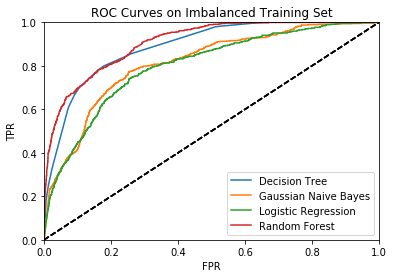

In [40]:
# plot ROC curve for each model on imbalanced training set
roc_curve_plot(model_DT, X_imb, y_imb, label='Decision Tree')
roc_curve_plot(model_GNB, X_imb, y_imb, label='Gaussian Naive Bayes')
roc_curve_plot(model_LR, X_imb, y_imb, label='Logistic Regression')
roc_curve_plot(model_RF, X_imb, y_imb, label='Random Forest')
plt.title('ROC Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

AUC score of Decision Tree is 0.7850.
AUC score of Gaussian Naive Bayes is 0.8200.
AUC score of Logistic Regression is 0.7949.
AUC score of Random Forest is 0.8233.


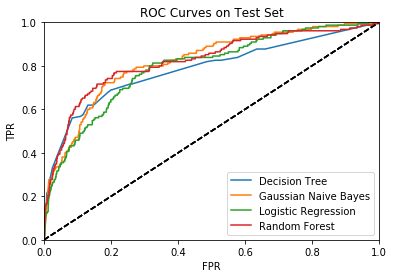

In [41]:
# plot ROC curve for each model on test dataset
roc_curve_plot(model_DT, X_test, y_test, label='Decision Tree')
roc_curve_plot(model_GNB, X_test, y_test, label='Gaussian Naive Bayes')
roc_curve_plot(model_LR, X_test, y_test, label='Logistic Regression')
roc_curve_plot(model_RF, X_test, y_test, label='Random Forest')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')

AUC score of Decision Tree is 0.8778.
AUC score of Gaussian Naive Bayes is 0.7876.
AUC score of Logistic Regression is 0.7740.
AUC score of Random Forest is 0.8716.


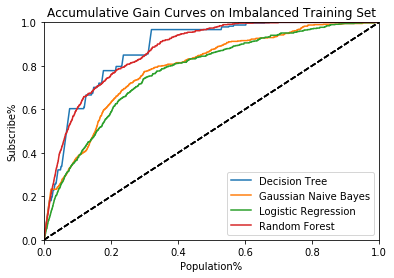

In [42]:
# Accumulative Lift Curves graph on imbalanced training set
lift_DT_imb = lift_input(model_DT, X_imb, y_imb)
gain_plot(lift_DT_imb, label='Decision Tree')
lift_GNB_imb = lift_input(model_GNB, X_imb, y_imb)
gain_plot(lift_GNB_imb, label='Gaussian Naive Bayes')
lift_LR_imb = lift_input(model_LR, X_imb, y_imb)
gain_plot(lift_LR_imb, label='Logistic Regression')
lift_RF_imb = lift_input(model_RF, X_imb, y_imb)
gain_plot(lift_RF_imb, label='Random Forest')
plt.title('Accumulative Gain Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

AUC score of Decision Tree is 0.7979.
AUC score of Gaussian Naive Bayes is 0.7914.
AUC score of Logistic Regression is 0.7668.
AUC score of Random Forest is 0.7926.


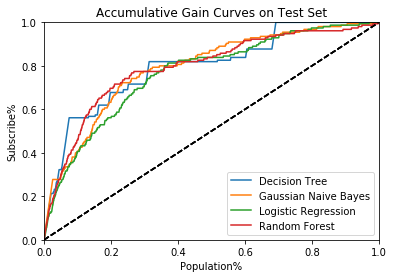

In [43]:
# Accumulative Lift Curves graph on test dataset
lift_DT = lift_input(model_DT, X_test, y_test)
gain_plot(lift_DT, label='Decision Tree')
lift_GNB = lift_input(model_GNB, X_test, y_test)
gain_plot(lift_GNB, label='Gaussian Naive Bayes')
lift_LR = lift_input(model_LR, X_test, y_test)
gain_plot(lift_LR, label='Logistic Regression')
lift_RF = lift_input(model_RF, X_test, y_test)
gain_plot(lift_RF, label='Random Forest')
plt.title('Accumulative Gain Curves on Test Set')
plt.legend(loc='lower right')

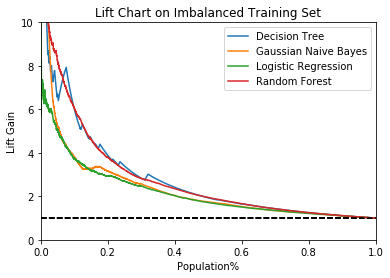

In [44]:
# create lift gain chart on training set
lift_chart_DT_imb = lift_chart(lift_DT_imb, label='Decision Tree')
lift_chart_GNB_imb = lift_chart(lift_GNB_imb, label='Gaussian Naive Bayes')
lift_chart_LR_imb = lift_chart(lift_LR_imb, label='Logistic Regression')
lift_chart_RF_imb = lift_chart(lift_RF_imb, label='Random Forest')
plt.title('Lift Chart on Imbalanced Training Set')
plt.legend(loc='upper right')

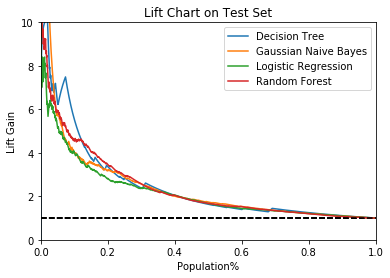

In [45]:
# create lift gain chart on test set
lift_chart_DT = lift_chart(lift_DT, label='Decision Tree')
lift_chart_GNB = lift_chart(lift_GNB, label='Gaussian Naive Bayes')
lift_chart_LR = lift_chart(lift_LR, label='Logistic Regression')
lift_chart_RF = lift_chart(lift_RF, label='Random Forest')
plt.title('Lift Chart on Test Set')
plt.legend(loc='upper right')

# Final Model Optimization and Evalution

In [46]:
# further fine tune decision tree model
parameters_DT_impv = {'criterion':['gini','entropy'], 
                      'splitter':['best','random'],
                      'max_depth': [5,6,7],
                      'min_samples_leaf': [2,3],
                      'min_samples_split': [2,3],
                      'max_features': [None,'auto','sqrt','log2'],
                      'class_weight': [None,'balanced'],
                      'presort': [True,False]
                     }

model_DT_impv = fit_classifier(DecisionTreeClassifier(random_state=66), X_train, y_train, 
                          parameters=parameters_DT_impv, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.7138
Final precision score on training data: 0.6634
Final Recall score on training data: 0.8685
Final ROC AUC score on training data: 0.7138


The best parameters are: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=66,
            splitter='random')


In [47]:
# Improved Decision Tree model performance on test dataset
y_test_DT_impv = classifier_test(model_DT_impv, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.5971
Final precision score on testing data: 0.1682
Final Recall score on testing data: 0.8194
Final ROC AUC score on testing data: 0.6965


In [48]:
# save the model to current directory
joblib.dump(model_DT_impv, 'saved_models/Decision_Tree_model_impv_2.pkl')

['saved_models/Decision_Tree_model_impv_2.pkl']

In [49]:
# load saved models
model_DT_impv2 = joblib.load('saved_models/Decision_Tree_model_impv_2.pkl')
# model_DT_impv = joblib.load('saved_models/Decision_Tree_model_impv_1.pkl')

AUC score of Decision Tree is 0.8778.
AUC score of Decision Tree - Improved is 0.8687.
AUC score of Decision Tree - Improved II is 0.8687.
AUC score of Gaussian Naive Bayes is 0.7876.
AUC score of Random Forest is 0.8716.


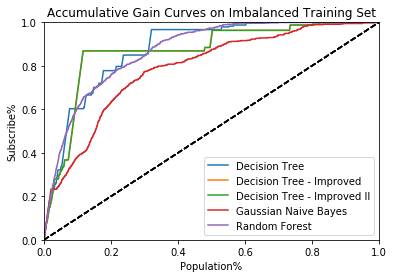

In [50]:
# Accumulative Lift Curves graph for improved Decision Tree model on imbalance dataset
lift_DT_imb = lift_input(model_DT, X_imb, y_imb)
gain_plot(lift_DT_imb, label='Decision Tree')
lift_DT_impv_imb = lift_input(model_DT_impv, X_imb, y_imb)
gain_plot(lift_DT_impv_imb, label='Decision Tree - Improved')
lift_DT_impv2_imb = lift_input(model_DT_impv2, X_imb, y_imb)
gain_plot(lift_DT_impv2_imb, label='Decision Tree - Improved II')
lift_GNB_imb = lift_input(model_GNB, X_imb, y_imb)
gain_plot(lift_GNB_imb, label='Gaussian Naive Bayes')

lift_RF_imb = lift_input(model_RF, X_imb, y_imb)
gain_plot(lift_RF_imb, label='Random Forest')


plt.title('Accumulative Gain Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

AUC score of Decision Tree is 0.7979.
AUC score of Decision Tree - Improved II is 0.8196.
AUC score of Decision Tree - Improved (Final) is 0.8196.
AUC score of Gaussian Naive Bayes is 0.7914.
AUC score of Random Forest is 0.7926.


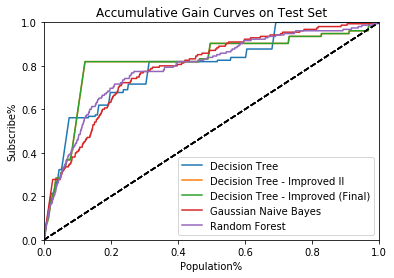

In [51]:
# Accumulative Lift Curves graph for improved Decision Tree model on test set
lift_DT = lift_input(model_DT, X_test, y_test)
gain_plot(lift_DT, label='Decision Tree')
lift_DT_impv2 = lift_input(model_DT_impv2, X_test, y_test)
gain_plot(lift_DT_impv2, label='Decision Tree - Improved II')
lift_DT_impv = lift_input(model_DT_impv, X_test, y_test)
gain_plot(lift_DT_impv, label='Decision Tree - Improved (Final)')

lift_GNB = lift_input(model_GNB, X_test, y_test)
gain_plot(lift_GNB, label='Gaussian Naive Bayes')


lift_RF_imb = lift_input(model_RF, X_test, y_test)
gain_plot(lift_RF_imb, label='Random Forest')

plt.title('Accumulative Gain Curves on Test Set')
plt.legend(loc='lower right')

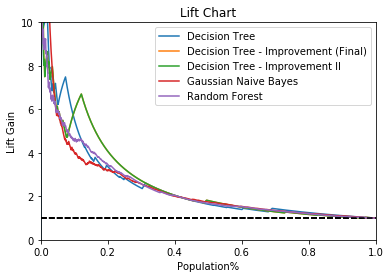

In [52]:
# create lift gain chart for improved models
lift_chart_DT = lift_chart(lift_DT, label='Decision Tree')
lift_chart_DT_impv = lift_chart(lift_DT_impv, label='Decision Tree - Improvement (Final)')
lift_chart_DT_impv2 = lift_chart(lift_DT_impv2, label='Decision Tree - Improvement II')
lift_chart_GNB = lift_chart(lift_GNB, label='Gaussian Naive Bayes')
lift_chart_RF = lift_chart(lift_RF, label='Random Forest')
plt.title('Lift Chart')
plt.legend(loc='upper right')

AUC score of Decision Tree is 0.8899.
AUC score of Decision Tree - Improved (Final) is 0.7926.
AUC score of Gaussian Naive Bayes is 0.8134.
AUC score of Random Forest is 0.9073.


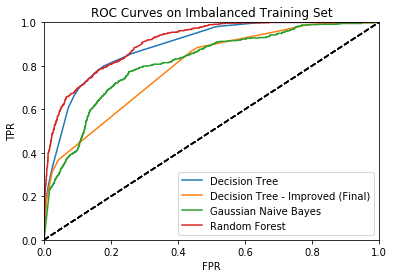

In [53]:
# plot ROC curve for improved model on imbalanced training set
roc_curve_plot(model_DT, X_imb, y_imb, label='Decision Tree')
roc_curve_plot(model_DT_impv, X_imb, y_imb, label='Decision Tree - Improved (Final)')
roc_curve_plot(model_GNB, X_imb, y_imb, label='Gaussian Naive Bayes')
roc_curve_plot(model_RF, X_imb, y_imb, label='Random Forest')
plt.title('ROC Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

AUC score of Decision Tree is 0.7850.
AUC score of Decision Tree - Improved (Final) is 0.7575.
AUC score of Gaussian Naive Bayes is 0.8200.
AUC score of Random Forest is 0.8233.


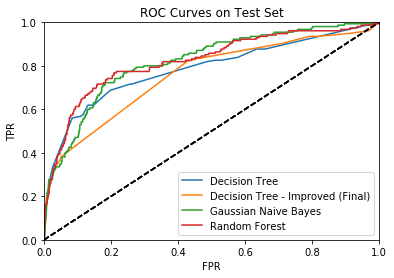

In [54]:
# plot ROC curve for improved model on test set
roc_curve_plot(model_DT, X_test, y_test, label='Decision Tree')
roc_curve_plot(model_DT_impv, X_test, y_test, label='Decision Tree - Improved (Final)')
roc_curve_plot(model_GNB, X_test, y_test, label='Gaussian Naive Bayes')
roc_curve_plot(model_RF, X_test, y_test, label='Random Forest')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')

In [55]:
# save final model to local disk
joblib.dump(model_DT_impv, 'saved_models/Final_model.pkl')

['saved_models/Final_model.pkl']

# Confusion Matrix Analysis


Confusion matrix

Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using :ref:`grid_search`.


Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion

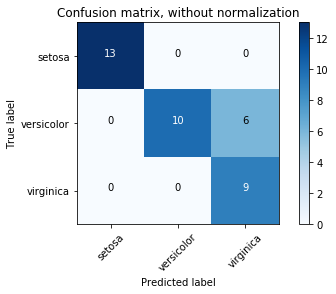

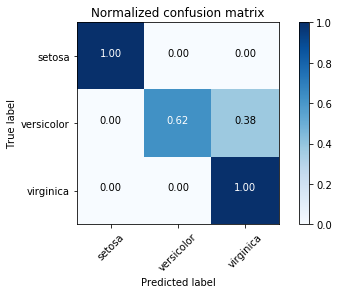

Normalized confusion matrix
[[ 0.81  0.19]
 [ 0.32  0.68]]


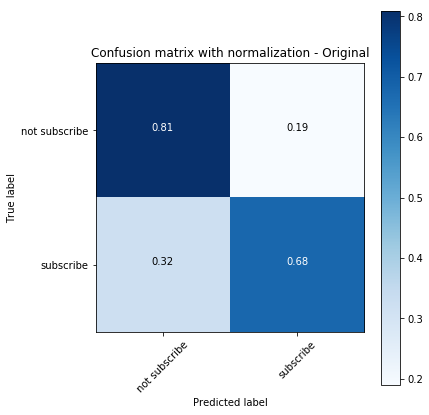

In [56]:
# marketing simulation with 20% client contact budget and confusion matrix analysis
from sklearn.metrics import confusion_matrix
from confusion_matrix_plot_module import plot_confusion_matrix # This is a function downloaded from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# make predictions on test set with original DT model
y_pred_DT = y_predict_threshold(model_DT, X_test, y_test, 0.2)

# create confusion matrix
confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)

# plot confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(confusion_matrix_DT, normalize=True, classes=['not subscribe','subscribe'],
                      title='Confusion matrix with normalization - Original')

Normalized confusion matrix
[[ 0.81  0.19]
 [ 0.32  0.68]]


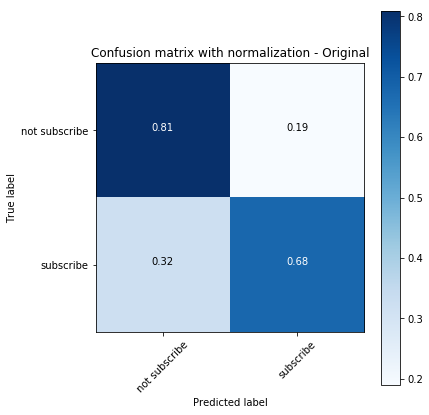

In [57]:
# marketing simulation with 20% client contact budget and confusion matrix analysis
from sklearn.metrics import confusion_matrix
import confusion_matrix_plot_module # This is a function downloaded from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# make predictions on test set with original DT model
y_pred_DT = y_predict_threshold(model_DT, X_test, y_test, 0.2)

# create confusion matrix
confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)

# plot confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(confusion_matrix_DT, normalize=True, classes=['not subscribe','subscribe'],
                      title='Confusion matrix with normalization - Original')

Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.37  0.63]]


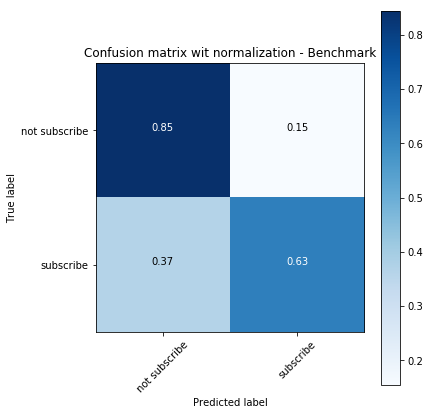

In [58]:
# plot confusion matrix on benchmark model
# make predictions on test set
y_pred_GNB = y_predict_threshold(model_GNB, X_test, y_test, 0.2)

# create confusion matrix
confusion_matrix_GNB = confusion_matrix(y_test, y_pred_GNB)
plt.figure(figsize=(6,6))
plot_confusion_matrix(confusion_matrix_GNB, normalize=True, classes=['not subscribe','subscribe'],
                      title='Confusion matrix wit normalization - Benchmark')

# Free-Form Visualization

AUC score of Decision Tree (AUC = 0.7958) is 0.8196.
AUC score of Benchmark Model (AUC = 0.7422) is 0.7914.


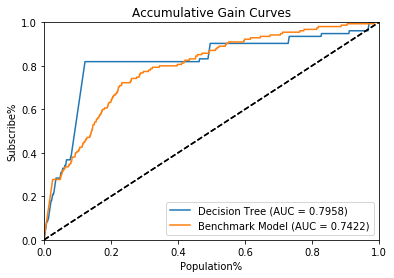

In [59]:
# Visualization showing the improvement of final model vs benchmark model
gain_plot(lift_DT_impv, label='Decision Tree (AUC = 0.7958)')
gain_plot(lift_GNB, label='Benchmark Model (AUC = 0.7422)' )
plt.title('Accumulative Gain Curves')
plt.legend(loc='lower right')

In [60]:
# quantitative comparison - final model vs benchmark
print('Sample Size  Decision Tree   Gaussian Naive Bayes')
for i in range(1,10):
    decile = i*10
    decile_DT = lift_DT_impv[0][int(len(lift_DT_impv[0])*i*0.1)]*100
    decile_GNB = lift_GNB[0][int(len(lift_GNB[0])*i*0.1)]*100
    print('%d%%          %.1f%%             %.1f%%' % (decile, decile_DT, decile_GNB))

Sample Size  Decision Tree   Gaussian Naive Bayes
10%          57.4%             40.6%
20%          81.9%             63.2%
30%          81.9%             77.4%
40%          81.9%             80.6%
50%          90.3%             87.1%
60%          90.3%             92.3%
70%          90.3%             94.2%
80%          93.5%             96.8%
90%          94.8%             98.7%


Top 10 features contribute to 100.3% of the final mode.


Text(0,0.5,'Importance Contribution %')

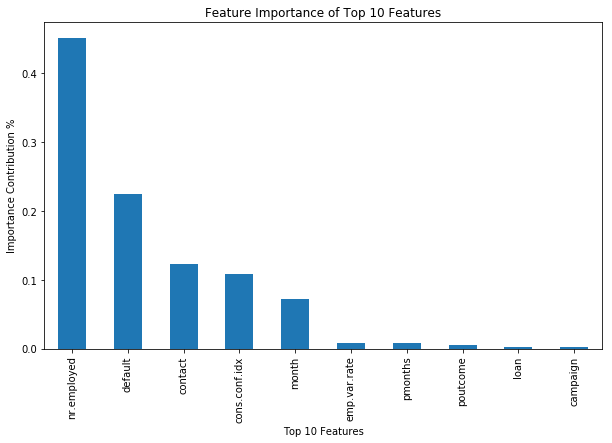

In [61]:
# visualize the feature importance of final model

# create series of feature importance of final model
series_feature = pd.Series(index=X_train.columns, data=model_DT_impv.feature_importances_.reshape(20,))

# combine the feature importance value of onehotencoded categorical features back to original feature list

feature_dict={} # create empty dictionary with keys defined
for i in train_processed.columns[:-1]:
    feature_dict[i]=0

# combine feature importance
for i in series_feature.index:
    for j in feature_dict.keys():
        if j in i:
            feature_dict[j]+=series_feature[i]
        else:
            continue

series_feature = pd.Series(feature_dict) # convert dictionary to Series
feature_sort = series_feature.sort_values(ascending=False) # Descending sort of feature importance
# calculate gross contribution
print('Top 10 features contribute to %.1f%% of the final mode.' % sum(feature_sort[0:10]*100))
feature_sort[0:10].plot.bar(figsize = (10, 6))
plt.title('Feature Importance of Top 10 Features')
plt.xlabel('Top 10 Features')
plt.ylabel('Importance Contribution %')

根据以上分析可知，我们选用 “model_RF” 作为是否market的分类器模型！！！

In [62]:
test_processed.default[(pd.isnull(test_processed['default'])) ]=1
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['custAge', 'campaign', 'pmonths', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
             'euribor3m', 'nr.employed']

test_processed[numerical] = scaler.fit_transform(test_processed[numerical])
test_processed = pd.get_dummies(test_processed)
test_processed = shuffle(test_processed)

X_test = test_processed.iloc[:,:]
y_test_market= model_RF.predict(X_test)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
y_test_market

array([ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0

这里直接返回： “是否market”

In [64]:
y_test_market.shape

(930,)

In [65]:
test_processed.insert(20,'market',y_test_market)
test_processed.to_csv('result/test_output_2.csv', index=False)

# Finished !!!
# ----------------------------------------------------------------------------------------------------------------

In [66]:
dataset = pd.read_csv('DataTraining.csv')
df=dataset.replace("unknown",np.nan)
df=df.replace("no",0)
df=df.replace("yes",1)
df.pop('id')
df.pop('pdays');
df_p = preprocess_data2(df,1)
df_p.default[df_p.default.isnull()]=1
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['custAge', 'campaign', 'pmonths', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
             'euribor3m', 'nr.employed']

df_p[numerical] = scaler.fit_transform(df_p[numerical])
df_p = pd.get_dummies(df_p)
df_p = shuffle(df_p)


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
df_market= model_RF.predict(df_p.iloc[:,:-2])

In [68]:
df_p.insert(22,'market',df_market)
df_p.to_csv('result/df_1.csv', index=False)